# Fashion_mnist dataset
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


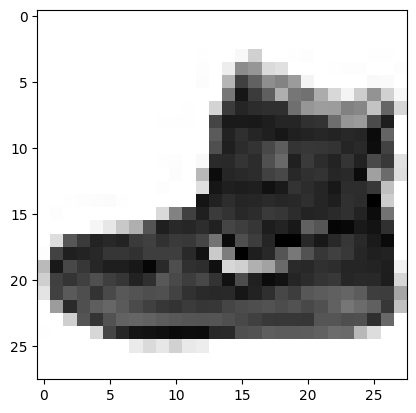

In [2]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [3]:
print("class : %d " % (y_train[0]))

class : 9 


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

## CNN

In [32]:
# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./FASHIONMNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               mode='min', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/30
221/225 [============================>.] - ETA: 0s - loss: 0.6832 - accuracy: 0.7580
Epoch 1: val_loss improved from inf to 0.39305, saving model to ./FASHIONMNIST_CNN.hdf5
225/225 [==============================] - 4s 13ms/step - loss: 0.6799 - accuracy: 0.7591 - val_loss: 0.3931 - val_accuracy: 0.8571
Epoch 2/30
 11/225 [>.............................] - ETA: 2s - loss: 0.4740 - accuracy: 0.8264

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


224/225 [============================>.] - ETA: 0s - loss: 0.4288 - accuracy: 0.8486
Epoch 2: val_loss improved from 0.39305 to 0.33327, saving model to ./FASHIONMNIST_CNN.hdf5
225/225 [==============================] - 3s 12ms/step - loss: 0.4283 - accuracy: 0.8487 - val_loss: 0.3333 - val_accuracy: 0.8771
Epoch 3/30
223/225 [============================>.] - ETA: 0s - loss: 0.3747 - accuracy: 0.8661
Epoch 3: val_loss improved from 0.33327 to 0.29871, saving model to ./FASHIONMNIST_CNN.hdf5
225/225 [==============================] - 3s 11ms/step - loss: 0.3747 - accuracy: 0.8661 - val_loss: 0.2987 - val_accuracy: 0.8880
Epoch 4/30
222/225 [============================>.] - ETA: 0s - loss: 0.3370 - accuracy: 0.8801
Epoch 4: val_loss improved from 0.29871 to 0.27564, saving model to ./FASHIONMNIST_CNN.hdf5
225/225 [==============================] - 3s 13ms/step - loss: 0.3366 - accuracy: 0.8803 - val_loss: 0.2756 - val_accuracy: 0.9008
Epoch 5/30
224/225 [============================>.]

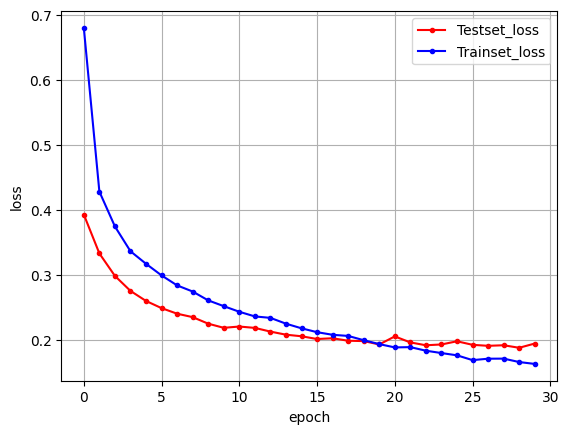

In [36]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

313/313 [==============================] - 1s 4ms/step



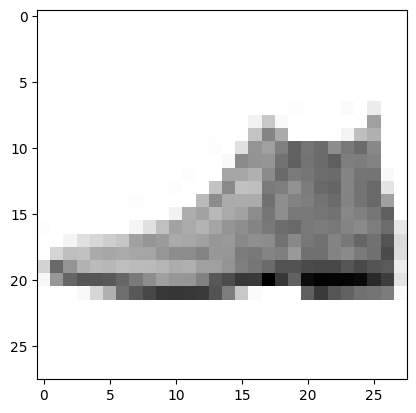

실제 아이템: Ankle boot, 예측 아이템: Ankle boot



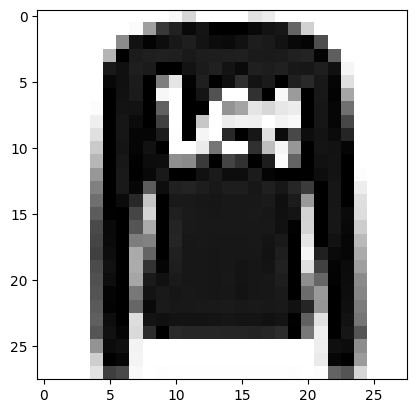

실제 아이템: Pullover, 예측 아이템: Pullover



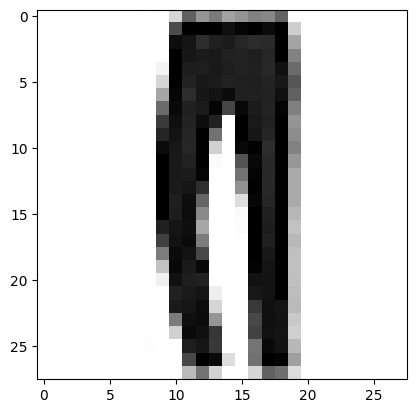

실제 아이템: Trouser, 예측 아이템: Trouser



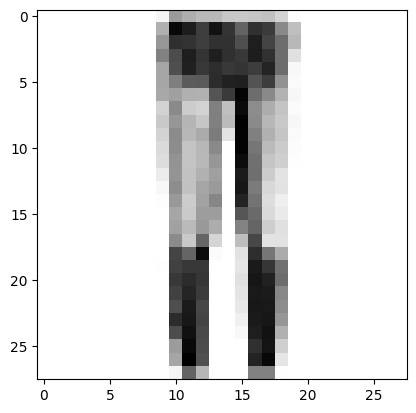

실제 아이템: Trouser, 예측 아이템: Trouser



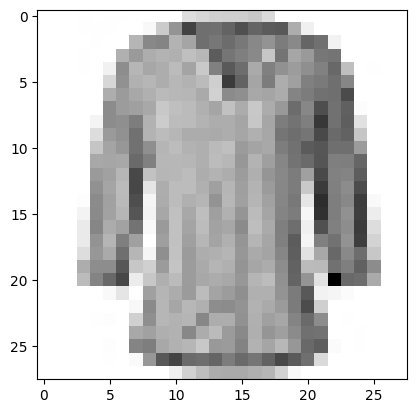

실제 아이템: Shirt, 예측 아이템: Shirt



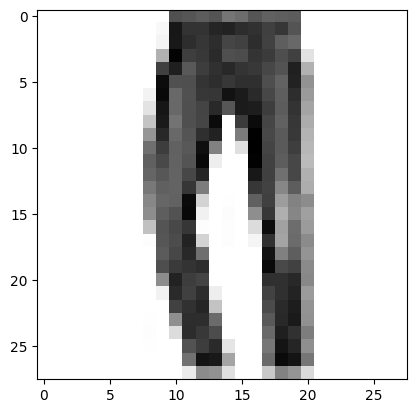

실제 아이템: Trouser, 예측 아이템: Trouser



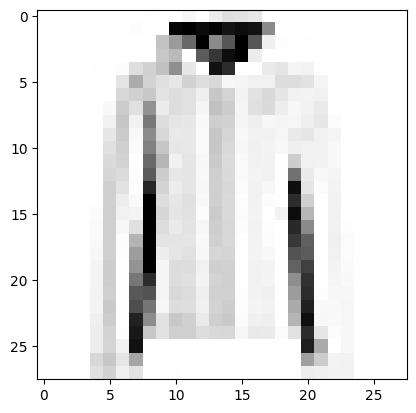

실제 아이템: Coat, 예측 아이템: Coat



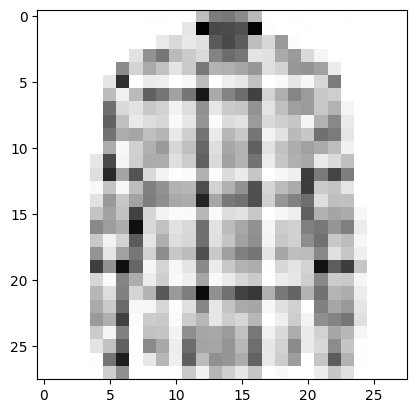

실제 아이템: Shirt, 예측 아이템: Shirt



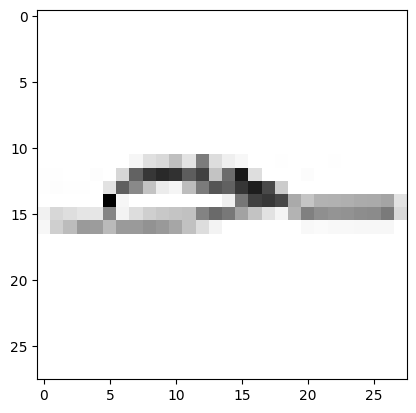

실제 아이템: Sandal, 예측 아이템: Sandal



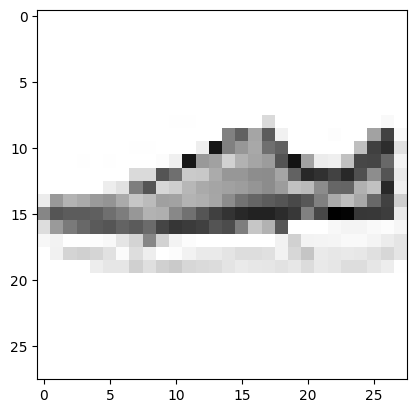

실제 아이템: Sneaker, 예측 아이템: Sneaker



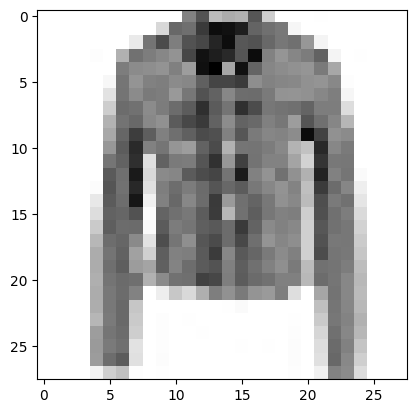

실제 아이템: Coat, 예측 아이템: Coat



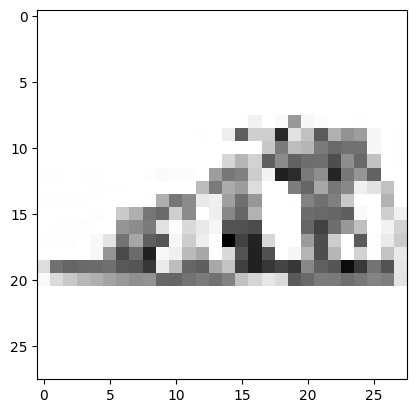

실제 아이템: Sandal, 예측 아이템: Sandal



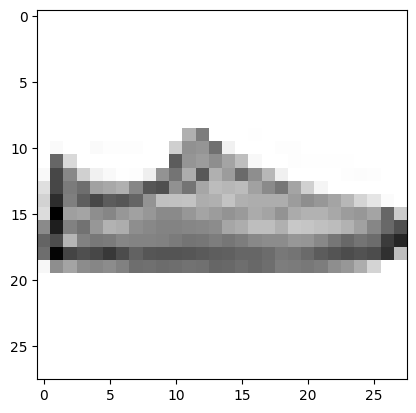

실제 아이템: Sneaker, 예측 아이템: Sandal



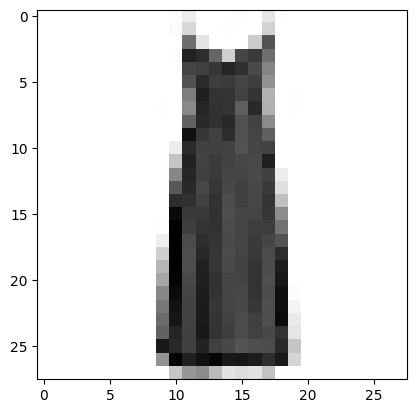

실제 아이템: Dress, 예측 아이템: Dress



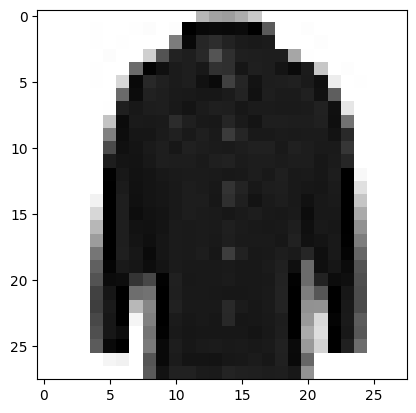

실제 아이템: Coat, 예측 아이템: Coat



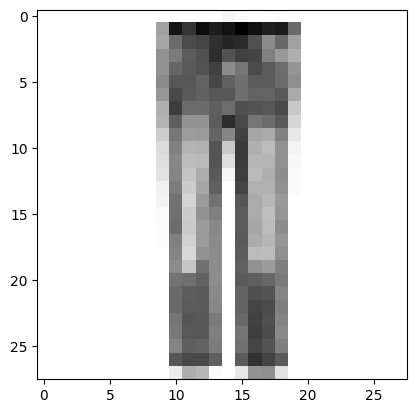

실제 아이템: Trouser, 예측 아이템: Trouser



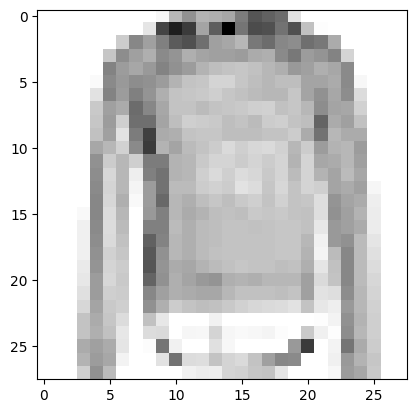

실제 아이템: Pullover, 예측 아이템: Pullover



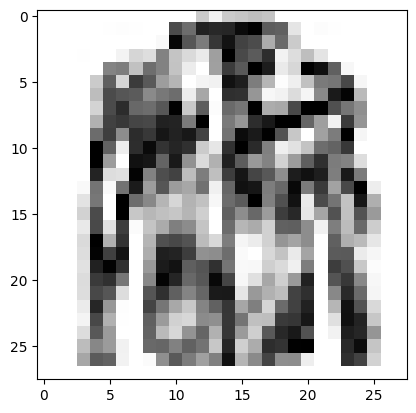

실제 아이템: Coat, 예측 아이템: Coat



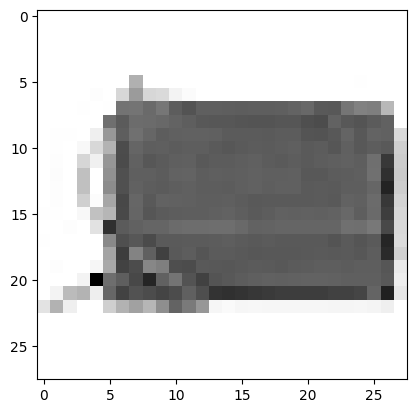

실제 아이템: Bag, 예측 아이템: Bag



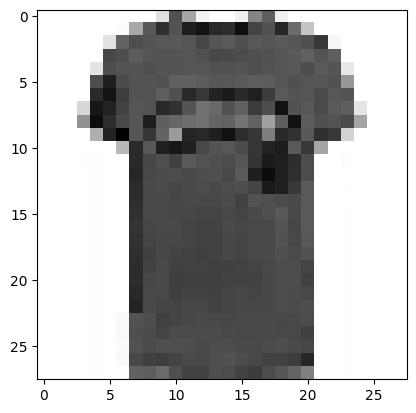

실제 아이템: T-shirt/top, 예측 아이템: T-shirt/top



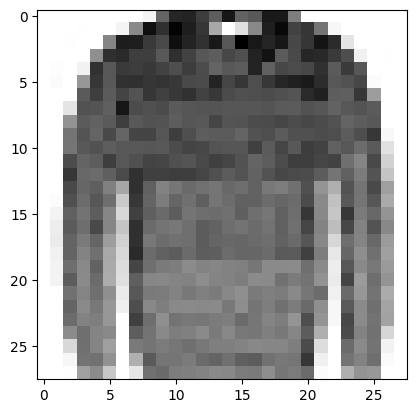

실제 아이템: Pullover, 예측 아이템: Pullover



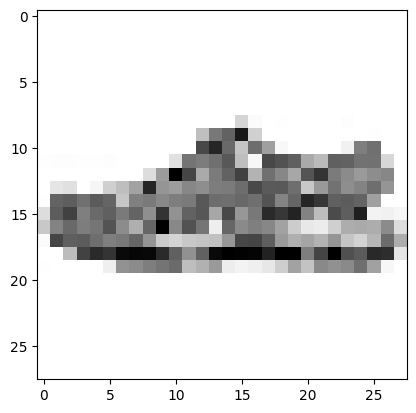

실제 아이템: Sandal, 예측 아이템: Sandal



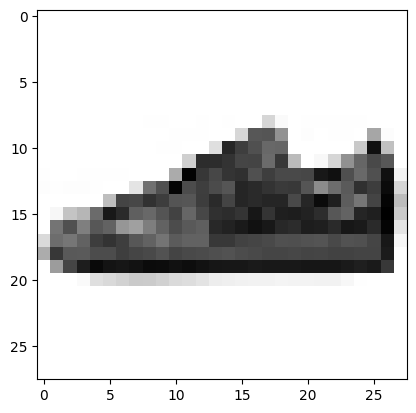

실제 아이템: Sneaker, 예측 아이템: Sneaker



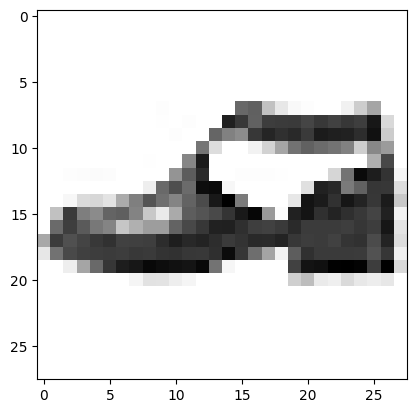

실제 아이템: Ankle boot, 예측 아이템: Sandal



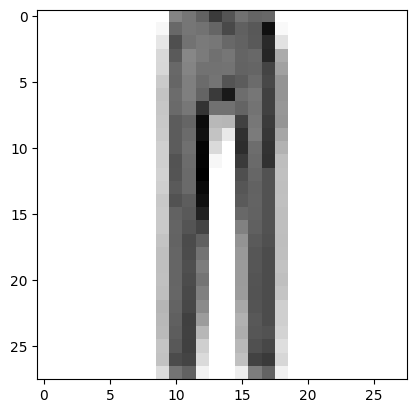

실제 아이템: Trouser, 예측 아이템: Trouser


In [39]:
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

item = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
        'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

y_pred = model.predict(X_test)
for i in range(25):
  print()
  real = np.argmax(y_test[i])
  pred = np.argmax(y_pred[i])
  plt.imshow(X_test[i], cmap='Greys')
  plt.show()
  print(f'실제 아이템: {item[real]}, 예측 아이템: {item[pred]}')